## Observations and Insights 

After 

In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import sklearn.datasets as dta

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_combined_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
# Display the data table for preview
mouse_combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [13]:
# Checking the number of mice.
total_mice = len(mouse_combined_df["Mouse ID"].unique())
total_mice

mouse_combined_df.count()

print("There are", len(mouse_combined_df), "mouse IDs")
print("There are", (total_mice), "unique mouse IDs")

There are 1893 mouse IDs
There are 249 unique mouse IDs


In [14]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
# Optional: Get all the data for the duplicate mouse ID. 
mouse_duplicates = mouse_combined_df.loc[mouse_combined_df.duplicated(subset=["Mouse ID","Timepoint"]),"Mouse ID"].unique()
mouse_duplicates

array(['g989'], dtype=object)

In [15]:
all_duplicates = mouse_combined_df[mouse_combined_df["Mouse ID"] == "g989"]
all_duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [16]:
clean_mouse = mouse_combined_df[mouse_combined_df["Mouse ID"].isin(mouse_duplicates)==False]
clean_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [17]:
# Checking the number of mice in the clean DataFrame.
clean_mouse.count()

Mouse ID              1880
Drug Regimen          1880
Sex                   1880
Age_months            1880
Weight (g)            1880
Timepoint             1880
Tumor Volume (mm3)    1880
Metastatic Sites      1880
dtype: int64

In [18]:
clean_mouse.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary Statistics

In [19]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
regimen_group = clean_mouse.groupby(["Drug Regimen"])

regimen_mean = regimen_group["Tumor Volume (mm3)"].mean()
regimen_median = regimen_group["Tumor Volume (mm3)"].median()
regimen_var = regimen_group["Tumor Volume (mm3)"].var()
regimen_std = regimen_group["Tumor Volume (mm3)"].std()
regimen_sem = regimen_group["Tumor Volume (mm3)"].sem()

regimen_summary_df = pd.DataFrame({"Mean of Tumor Volume (mm3)": regimen_mean,
                                   "Median of Tumor Volume (mm3)": regimen_median,
                                   "Variance of Tumor Volume (mm3)": regimen_var,
                                   "Standard Deviation of Tumor Volume (mm3)": regimen_std,
                                   "SEMs of Tumor Volume (mm3)": regimen_sem})

regimen_summary_df

,Mean of Tumor Volume (mm3),Median of Tumor Volume (mm3),Variance of Tumor Volume (mm3),Standard Deviation of Tumor Volume (mm3),SEMs of Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [20]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
regimen_summary = regimen_group["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
regimen_summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [66]:
mouse_treatments = clean_mouse["Drug Regimen"].value_counts()
mouse_treatments

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Drug Regimen, dtype: int64

Text(0.5, 1.0, 'Number of Mice per Treatment\n Pandas')

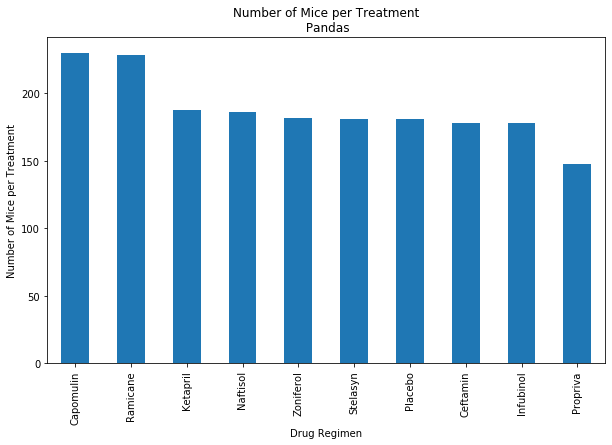

In [72]:
ax = mouse_treatments.plot.bar(figsize=(10,6), width=0.5)
ax.set_xlabel("Drug Regimen")
ax.set_ylabel("Number of Mice per Treatment")
ax.set_title("Number of Mice per Treatment\n Pandas")

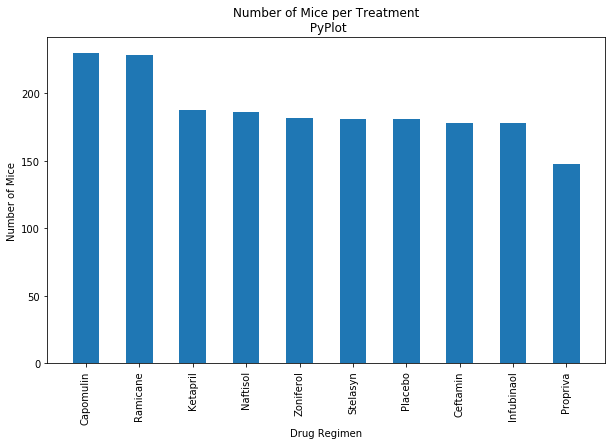

In [74]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
plt.figure(figsize=(10,6))

x_axis = mouse_treatments.index
y_axis = mouse_treatments.values

plt.bar(x_axis, y_axis, width=0.5,)

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin","Ramicane","Ketapril","Naftisol","Zoniferol","Stelasyn","Placebo","Ceftamin",
                           "Infubinaol","Propriva"], rotation="vertical")

plt.title("Number of Mice per Treatment\n PyPlot")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.show()

In [75]:
# find value counts to see the data before plotting
mouse_sex = clean_mouse.groupby(["Mouse ID", "Sex"])
mouse_sex_df = pd.DataFrame(sex_group.size())

mouse_sex_count = pd.DataFrame(mouse_sex_df.groupby(["Sex"]).count())
mouse_sex_count.columns = ["Total Count"]

mouse_sex_count["Percentage of Sex (Male vs Female)"] = (100*(mouse_sex_count["Total Count"] / mouse_sex_count["Total Count"].sum()))
mouse_sex_count["Percentage of Sex (Male vs Female)"] = mouse_sex_count["Percentage of Sex (Male vs Female)"]
mouse_sex_count.round(2)

,Total Count,Percentage of Sex (Male vs Female)
Sex,,
Female,123,49.6
Male,125,50.4


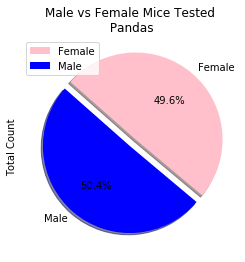

In [76]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
labels = ["Male", "Female"]

colors = ["pink", "blue"]

explode = (0.1,0)

mouse_sex_count.plot.pie(y = "Total Count", title="Male vs Female Mice Tested\n Pandas", autopct="%1.1f%%", startangle=320, colors=colors,
                        explode=explode, shadow=True)
plt.legend(loc=2)

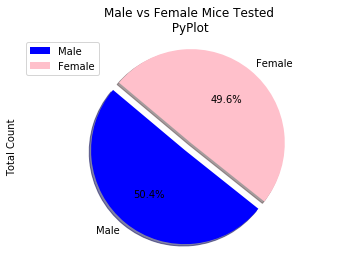

In [77]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]

sizes = [125, 123]

colors = ["blue", "pink"]

explode = (0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", startangle=140, shadow=True)
plt.axis("equal")
plt.ylabel("Total Count")
plt.title("Male vs Female Mice Tested\n PyPlot")
plt.legend(loc=2)

## Quartiles, Outliers and Boxplots

In [89]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatments = ("Capomulin","Ramicane","Infubinol","Ceftamin")
drug = clean_mouse.loc[clean_mouse["Drug Regimen"].isin(treatments)]

# Start by getting the last (greatest) timepoint for each mouse
tum_vol = drug.groupby(drug["Mouse ID"]).agg({"Timepoint":["max"]})
tum_vol.columns = ["Timepoint"]

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tum_vol = tum_vol.reset_index()
tum_vol_final = pd.merge(tum_vol, clean_mouse, how="left", on=["Mouse ID", "Timepoint"])
tum_vol_final

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [103]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tum_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
for drug in treatments:
    tum_vol_drug = tum_vol_final["Tumor Volume (mm3)"].loc[tum_vol_final["Drug Regimen"] == drug]
    
    # add subset 
    tum_vol_data.append(tum_vol_drug)
    
    # Determine outliers using upper and lower bounds
    quartiles = tum_vol_drug.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = (upperq-lowerq).round(2)
    
    print(f"For {drug}, the Interquartile Range is {iqr}.")
    
    lower_bound = (lowerq - (1.5*iqr)).round(2)
    upper_bound = (upperq + (1.5*iqr)).round(2)
    
    print(f"For {drug}, values below {lower_bound} could be outliers.")
    print(f"For {drug}, values above {upper_bound} could be outliers.")
    

For Capomulin, the Interquartile Range is 7.78.
For Capomulin, values below 20.71 could be outliers.
For Capomulin, values above 51.83 could be outliers.
For Ramicane, the Interquartile Range is 9.1.
For Ramicane, values below 17.91 could be outliers.
For Ramicane, values above 54.31 could be outliers.
For Infubinol, the Interquartile Range is 11.48.
For Infubinol, values below 36.83 could be outliers.
For Infubinol, values above 82.75 could be outliers.
For Ceftamin, the Interquartile Range is 15.58.
For Ceftamin, values below 25.35 could be outliers.
For Ceftamin, values above 87.67 could be outliers.


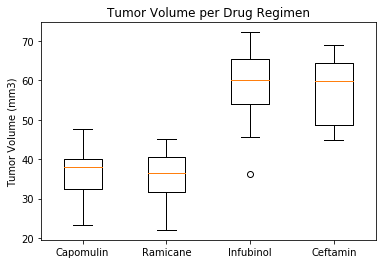

In [113]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, ax = plt.subplots()
ax.set_title("Tumor Volume per Drug Regimen")
ax.set_xticklabels(treatments)
ax.set_ylabel("Tumor Volume (mm3)")
ax.boxplot(tum_vol_data)
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

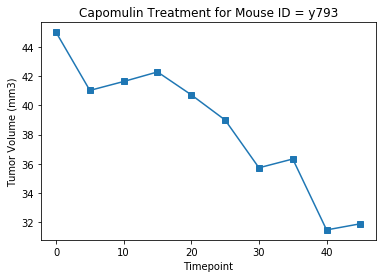

In [115]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse = clean_mouse[["Timepoint", "Tumor Volume (mm3)"]].loc[(clean_mouse["Drug Regimen"] == "Capomulin") & (clean_mouse["Mouse ID"] == "y793")]
mouse

plt.plot(mouse["Timepoint"], mouse["Tumor Volume (mm3)"], marker='s')
plt.title("Capomulin Treatment for Mouse ID = y793")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

(30, 50)

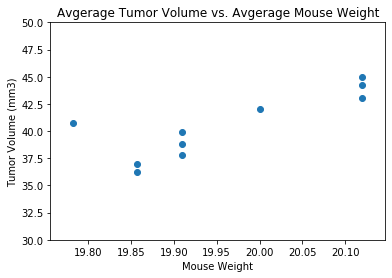

In [123]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_avg_tumor_weight = clean_mouse.loc[clean_mouse["Drug Regimen"] == "Capomulin"].groupby(clean_mouse["Timepoint"]).agg({"Tumor Volume (mm3)":["mean"], "Weight (g)":["mean"]})
cap_avg_tumor_weight.columns = ["Average Tumor Volume (mm3)", "Average Mouse Weight (g)"]

avg_tum_vol = cap_avg_tumor_weight["Average Tumor Volume (mm3)"]
avg_mouse_weight = cap_avg_tumor_weight["Average Mouse Weight (g)"]
plt.scatter(avg_mouse_weight, avg_tum_vol)
plt.title("Avgerage Tumor Volume vs. Avgerage Mouse Weight")
plt.xlabel("Mouse Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.ylim(30,50)

## Correlation and Regression

The correlation between Average Tumor Volume and Mouse Weight is 0.82
The linear regression equation is y = 20.29x + -364.52


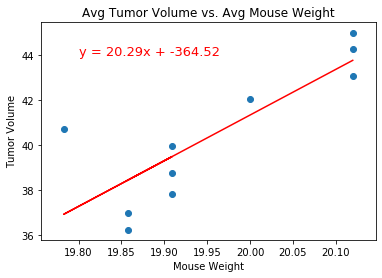

In [130]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(avg_tum_vol,avg_mouse_weight)
print(f'The correlation between Average Tumor Volume and Mouse Weight is {round(correlation[0],2)}')

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(avg_mouse_weight,avg_tum_vol)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f'The linear regression equation is {line_eq}')

avg_tum_vol = cap_avg_tumor_weight['Average Tumor Volume (mm3)']
avg_mouse_weight = cap_avg_tumor_weight['Average Mouse Weight (g)']
plt.scatter(avg_mouse_weight,avg_tum_vol)
plt.title('Avg Tumor Volume vs. Avg Mouse Weight')
plt.xlabel('Mouse Weight')
plt.ylabel('Tumor Volume')

reg_values = avg_mouse_weight * slope + intercept
plt.plot(avg_mouse_weight, reg_values, "r-")
plt.annotate(line_eq,(19.80,44),fontsize=13,color="red")
plt.show()